In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("../titanic/train.csv")

df.head(10)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [129]:
df = df.drop(columns=["Cabin", "Ticket", "Name"])

df["Age"] = df["Age"].fillna(df["Age"].median())

df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])

df["Sex"] = (df["Sex"] == "male").astype(int)

df = pd.get_dummies(df, columns=["Embarked"], drop_first=True)

df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,1,0,3,1,22.0,1,0,7.2500,False,True
1,2,1,1,0,38.0,1,0,71.2833,False,False
2,3,1,3,0,26.0,0,0,7.9250,False,True
3,4,1,1,0,35.0,1,0,53.1000,False,True
4,5,0,3,1,35.0,0,0,8.0500,False,True
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.0,0,0,13.0000,False,True
887,888,1,1,0,19.0,0,0,30.0000,False,True
888,889,0,3,0,28.0,1,2,23.4500,False,True
889,890,1,1,1,26.0,0,0,30.0000,False,False


In [130]:
X = df.drop(columns=["Survived"])

y = df["Survived"]

In [131]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [132]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [133]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [134]:
accuracy = knn.score(X_test_scaled, y_test)
accuracy

0.8044692737430168

In [135]:
from sklearn.metrics import roc_curve, auc

y_prob = dt.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
score = auc(fpr, tpr)


Text(0.5, 1.0, 'ROC Curve')

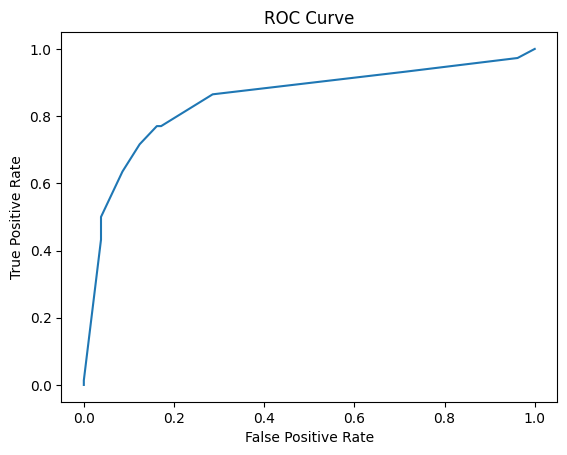

In [136]:
import matplotlib.pyplot as plt

plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")

In [137]:
from sklearn.metrics import confusion_matrix

y_pred = knn.predict(X_test_scaled)
confusion_matrix(y_test, y_pred)

array([[90, 15],
       [20, 54]])

In [138]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt = DecisionTreeClassifier(
    max_depth=4,
    random_state=42
)

dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))



0.7988826815642458
[[96  9]
 [27 47]]


In [139]:
from sklearn.metrics import roc_curve, auc

y_prob = dt.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
score = auc(fpr, tpr)

Text(0.5, 1.0, 'ROC Curve')

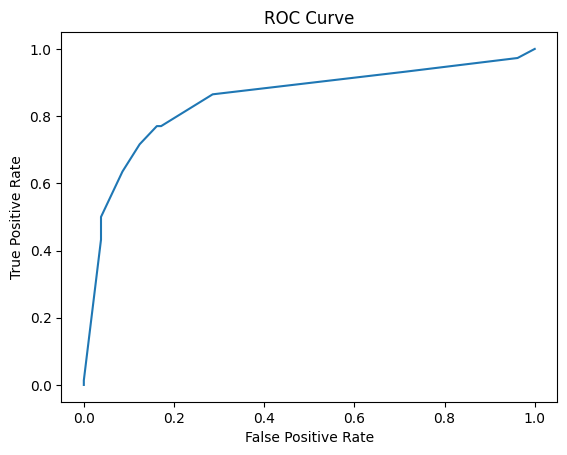

In [140]:
import matplotlib.pyplot as plt

plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")